In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import numpy as np
import imgaug.augmenters as iaa


#/content/drive/My Drive/level_0_500
DATADIR = "/content/drive/MyDrive/resized_train_cropped"
CATEGORIES = ["level_0","level_4"]
#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_data = []


def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_COLOR)[...,::-1]
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.addWeighted(img_array,4, cv2.GaussianBlur(img_array , (0,0) , 15) ,-4 ,128)
                new_array = cv2.resize(img_array, (512, 512))
                training_data.append([new_array, class_num])
                rotate=iaa.Affine(rotate=(90))
                rotated_image=rotate.augment_image(new_array)
                training_data.append([rotated_image, class_num])
                flip_hr=iaa.Fliplr(p=1.0)
                flip_hr_image= flip_hr.augment_image(new_array)
                training_data.append([flip_hr_image, class_num])
            except Exception as e:
                pass

In [ ]:
create_training_data()

In [ ]:
len(training_data)

1536

In [ ]:
random.shuffle(training_data)

In [ ]:
X = [] #features
y = [] #labels

for features in training_data:
    X.append(features[0])
    y.append(features[1])

In [ ]:
X = np.array(X)
X.shape

(1536, 512, 512)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
train_y=np.array(train_y)
test_y=np.array(test_y)

In [ ]:
#train_X.shape
import numpy as np
train_X = (train_X/255.0)

In [ ]:
test_X = (test_X/255.0)


In [ ]:
train_X = train_X.reshape(train_X.shape[0], *(512, 512, 1))

In [ ]:
test_X = test_X.reshape(test_X.shape[0], *(512, 512, 1))

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
import keras

model = Sequential()
# 3 convolutional layers
model.add(Conv2D(64, (3,3), input_shape = (512, 512 ,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers


model.add(Flatten())
model.add(Dense(2048))
model.add(Activation("relu"))

model.add(Dense(1024))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="sparse_categorical_crossentropy",
				optimizer=opt,
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images


In [ ]:
history = model.fit(train_X, train_y, batch_size=20, epochs=10)

Epoch 1/10
62/62 [==============================] - 8s 134ms/step - loss: 0.6982 - accuracy: 0.4992
Epoch 2/10
62/62 [==============================] - 8s 130ms/step - loss: 0.6914 - accuracy: 0.5326
Epoch 3/10
62/62 [==============================] - 8s 131ms/step - loss: 0.6791 - accuracy: 0.5871
Epoch 4/10
62/62 [==============================] - 8s 130ms/step - loss: 0.6410 - accuracy: 0.6425
Epoch 5/10
62/62 [==============================] - 8s 131ms/step - loss: 0.5934 - accuracy: 0.6971
Epoch 6/10
62/62 [==============================] - 8s 131ms/step - loss: 0.5749 - accuracy: 0.7117
Epoch 7/10
62/62 [==============================] - 8s 131ms/step - loss: 0.5257 - accuracy: 0.7353
Epoch 8/10
62/62 [==============================] - 8s 131ms/step - loss: 0.4958 - accuracy: 0.7606
Epoch 9/10
62/62 [==============================] - 8s 131ms/step - loss: 0.4290 - accuracy: 0.8005
Epoch 10/10
62/62 [==============================] - 8s 131ms/step - loss: 0.3698 - accuracy: 0.8241

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_X)

ypred=[]

for i in y_pred:
    if i[0]>i[1]:
        ypred.append(0)
    else:
        ypred.append(1)
ypred=np.array(ypred)

print(confusion_matrix(test_y,ypred))
print(classification_report(test_y,ypred))

[[115  34]
 [ 59 100]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       149
           1       0.75      0.63      0.68       159

    accuracy                           0.70       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.70      0.70      0.70       308



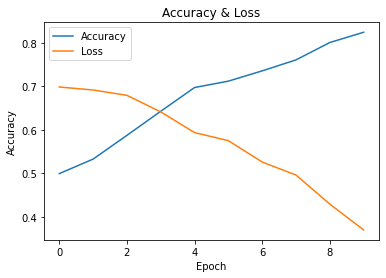

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Accuracy & Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
           
plt.legend(['Accuracy','Loss'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
# we will optimize the type of pooling layer (max or average) and the activation function of the 2nd and 3rd convolution layers 
def create_cnn_model():
  model = Sequential()
# 3 convolutional layers
  model.add(Conv2D(64, (3,3), input_shape = (512, 512 ,1)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(512, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers


  model.add(Flatten())
  model.add(Dense(2048))
  model.add(Activation("relu"))

  model.add(Dense(1024))
  model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
  model.add(Dense(2))
  model.add(Activation("softmax"))

# Compiling the model using some basic parameters
  opt = keras.optimizers.Adam(lr=0.0001)
  model.compile(loss="sparse_categorical_crossentropy",
				optimizer=opt,
				metrics=["accuracy"])
  return model

cnn = create_cnn_model()

cnn.compile(loss="sparse_categorical_crossentropy",
				optimizer=opt,
				metrics=["accuracy"])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 510, 510, 64)      640       
_________________________________________________________________
activation_8 (Activation)    (None, 510, 510, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 255, 255, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 253, 253, 128)     73856     
_________________________________________________________________
activation_9 (Activation)    (None, 253, 253, 128)     0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 256)    

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
# create model
model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# define parameters and values for grid search 
batch_size = [10,15,20,30,40]
epochs = [5,6,7, 8, 9,10 ]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,scoring = 'accuracy')
grid_result = grid.fit(train_X, train_y)
print(grid_result.best_params_)


Epoch 1/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6947 - accuracy: 0.5130
Epoch 2/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6823 - accuracy: 0.5676
Epoch 3/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6351 - accuracy: 0.6384
Epoch 4/5
123/123 [==============================] - 9s 74ms/step - loss: 0.5787 - accuracy: 0.6979
Epoch 5/5
123/123 [==============================] - 9s 74ms/step - loss: 0.5484 - accuracy: 0.7166
{'batch_size': 10, 'epochs': 5}


In [ ]:
history = model.fit(train_X, train_y, batch_size=10, epochs=5)

Epoch 1/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6948 - accuracy: 0.5024
Epoch 2/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6842 - accuracy: 0.5733
Epoch 3/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6769 - accuracy: 0.5651
Epoch 4/5
123/123 [==============================] - 9s 74ms/step - loss: 0.6108 - accuracy: 0.6759
Epoch 5/5
123/123 [==============================] - 9s 74ms/step - loss: 0.5829 - accuracy: 0.7068


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred1 = model.predict(test_X)

print(confusion_matrix(test_y,y_pred1))
print(classification_report(test_y,y_pred1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
10/10 [==============================] - 1s 70ms/step
[[ 96  53]
 [ 28 131]]
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       149
           1       0.71      0.82      0.76       159

    accuracy                           0.74       308
   macro avg       0.74      0.73      0.73       308
weighted avg       0.74      0.74      0.73       308



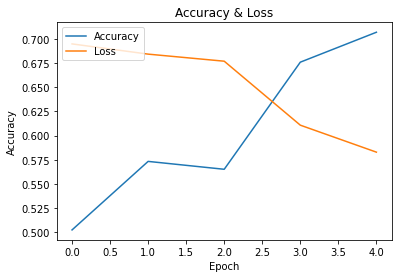

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Accuracy & Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
           
plt.legend(['Accuracy','Loss'], loc='upper left')
plt.show()